In [19]:
# Emily Lewis
# Homework 5
# OCNG 689
from __future__ import print_function   # Python 2/3 compatability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

# 1 Flyover States

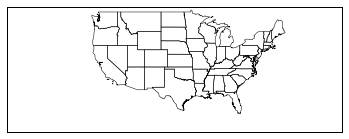

In [20]:
# 1 Flyover states
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
states = m.readshapefile('../python4geosciences/materials/states_21basic/states', 'states')

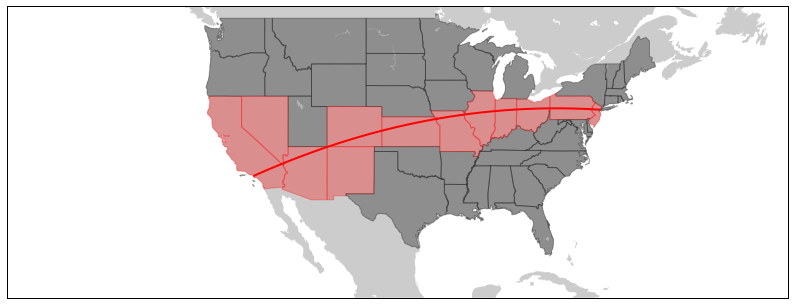

In [28]:
# plot of the shortest distance between LA and NYC

fig = plt.figure(figsize=(14,16))
ax = fig.add_subplot(111)
ax.plot(x,y,'-r', lw=2)
m.fillcontinents();

states = shapely.ops.linemerge(m.states)

line = shapely.geometry.LineString(zip(x,y))
x,y = m.gcpoints(-118.4081,33.9425,-74.1686,40.6925,100);

pols = []
for poly in states:
    if poly.intersects(line):
        color = 'r'
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    w,z = zip(*coords)
    plt.fill(w,z, color=color, alpha=0.3)


w,z = zip(*line.coords[:])
plt.plot(w,z, '--k')
plt.gca().set_aspect(1.0)

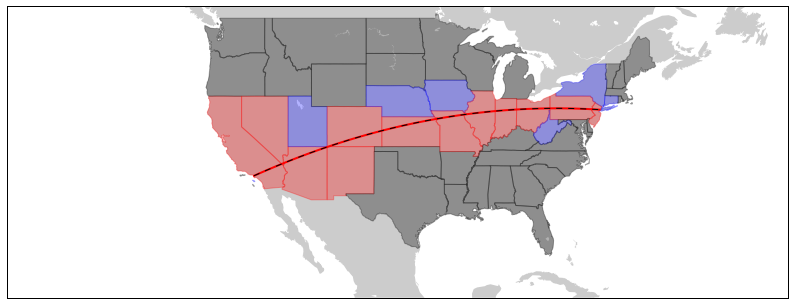

In [37]:
# Use the information in m.states_info to extract and print a list containing the names of the 
# states seen, with unique names. (see np.unique)


fig = plt.figure(figsize=(14,16))
ax = fig.add_subplot(111)
ax.plot(x,y,'-r', lw=2)
m.fillcontinents();

states = shapely.ops.linemerge(m.states)

line = shapely.geometry.LineString(zip(x,y))
x,y = m.gcpoints(-118.4081,33.9425,-74.1686,40.6925,100);

pols = []
for poly in states:
    if poly.intersects(line):
        color = 'r'
    elif poly.intersects(line.buffer(100000)):
        color = 'b'
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    w,z = zip(*coords)
    plt.fill(w,z, color=color, alpha=0.3)


w,z = zip(*line.coords[:])
plt.plot(w,z, '--k')
plt.gca().set_aspect(1.0)

# The red lines are the states the airplane flies over and the blue lines are additional states
# the passenger might see from teh plane. 

In [ ]:
# Create and display a map that shows the flight path, with the states that are seen along the 
# flight path clearly highlighted in some way.

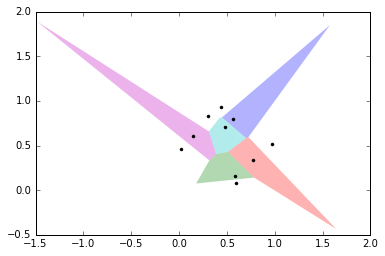

In [42]:
# 2 Area in a Voronoi diagram

from scipy import spatial

pts = np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])

vor = spatial.Voronoi(pts)
    
for indices in vor.regions:
    if not indices: continue    
    if -1 in indices: continue   
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)

plt.plot(pts[:, 0], pts[:, 1], '.k')

In [24]:
# 3 2D interpolation

data = np.loadtxt('python4geosciences/data/MS03_L15.txt')



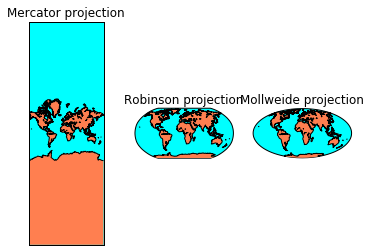

In [49]:
# 4 Area of Greenland and Australia in different projections
from mpl_toolkits.basemap import Basemap
# Mercator, Robinson, and Mollweide

fig = plt.figure()

ax = fig.add_subplot(131)
ax.set_title("Mercator projection")
map = Basemap(projection='merc', lon_0 = 10, lat_0 = 50)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

ax = fig.add_subplot(132)
ax.set_title("Robinson projection")
map = Basemap(projection='robin', lon_0 = 10, lat_0 = 50)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

ax = fig.add_subplot(133)
ax.set_title("Mollweide projection")
map = Basemap(projection='moll', lon_0 = 10, lat_0 = 50)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

In [59]:
greenland = m.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False) 
m.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

(1,
 5,
 [112.91972351074276, -55.11694335937477, 0.0, 0.0],
 [159.25608825683616, -9.221098899841202, 0.0, 0.0])

In [53]:
# m.greenland
m.greenland.area()

AttributeError: 'list' object has no attribute 'area'

In [58]:
def area(vertices):
    n = len(vertices) # of corners
    a = 0.0
    for i in range(n):
        j = (i + 1) % n
        a += abs(vertices[i][0] * vertices[j][1]-vertices[j][0] * vertices[i][1])
    result = a / 2.0
    return result

area(np.asarray(greenland))

NameError: name 'greenland' is not defined